In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!fc-list | grep Nanum
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,267 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and dire

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
from google.colab import drive

In [ ]:
# Google Drive 마운트
drive.mount('/content/drive')

# 데이터 경로 설정
base_path = '/content/drive/MyDrive/2024/TextMining'
baseline_path = os.path.join(base_path, '강약점분석')  # Baseline 결과 경로
log_weighted_path = os.path.join(base_path, 'thumbsUp/preprocessed4')  # 결과 경로

app_names = ['네이버부동산', '다방', '직방', '피터팬', '호갱노노']

Mounted at /content/drive


In [ ]:
# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
try:
    font_prop = fm.FontProperties(fname=font_path)
    rc('font', family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = True
except Exception:
    print("Warning: Font 'NanumSquare' not found. Using default font.")
    rc('font', family='sans-serif')
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = False

In [ ]:
# 시각화 함수 정의
def plot_app_data(app_name, output_path):
    strength_file = os.path.join(output_path, f"{app_name}_log_강점_분석결과.csv")
    weakness_file = os.path.join(output_path, f"{app_name}_log_약점_분석결과.csv")

    if not os.path.exists(strength_file) or not os.path.exists(weakness_file):
        print(f"{app_name}의 데이터 파일이 존재하지 않습니다.")
        return

    # 데이터 로드
    strengths = pd.read_csv(strength_file).head(10)  # 상위 10개
    weaknesses = pd.read_csv(weakness_file).head(10)  # 상위 10개

    # 강점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(strengths['Strengths'], strengths['Weighted Count'])
    plt.title(f'{app_name} - 강점 분석 결과', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"{app_name}_강점_시각화.png"))
    plt.show()

    # 약점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(weaknesses['Weaknesses'], weaknesses['Weighted Count'])
    plt.title(f'{app_name} - 약점 분석 결과', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"{app_name}_약점_시각화.png"))
    plt.show()


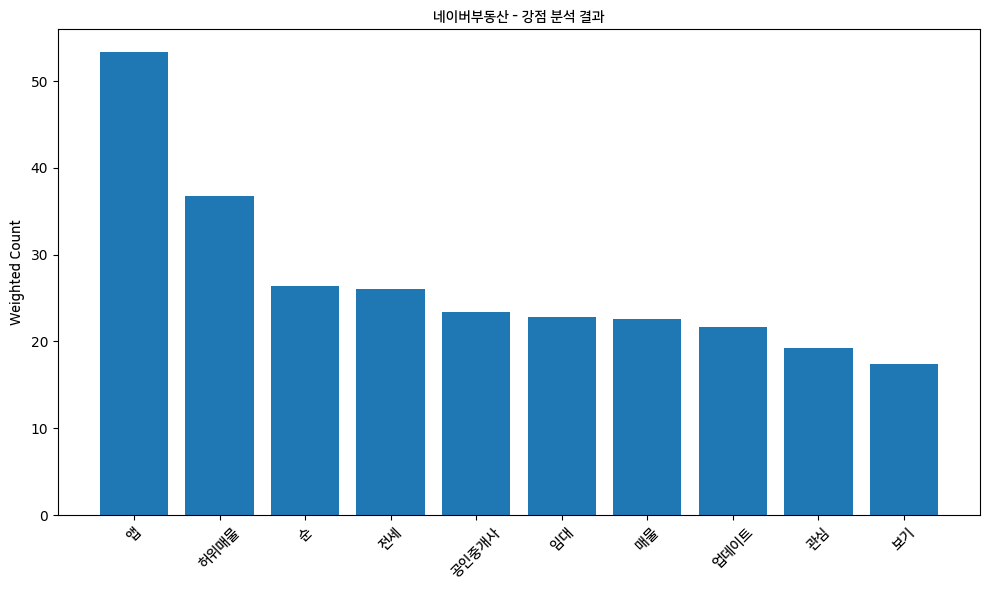

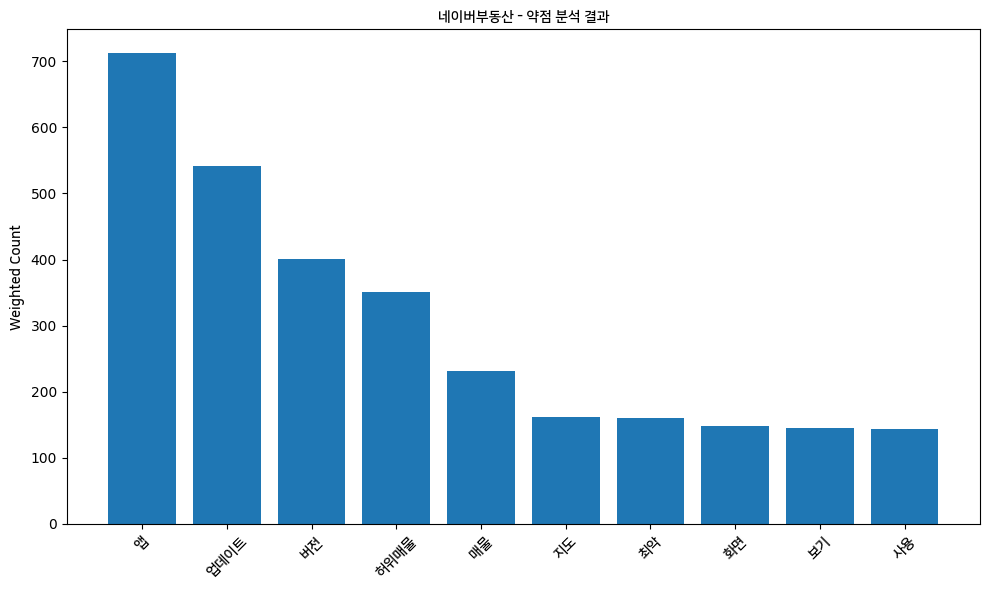

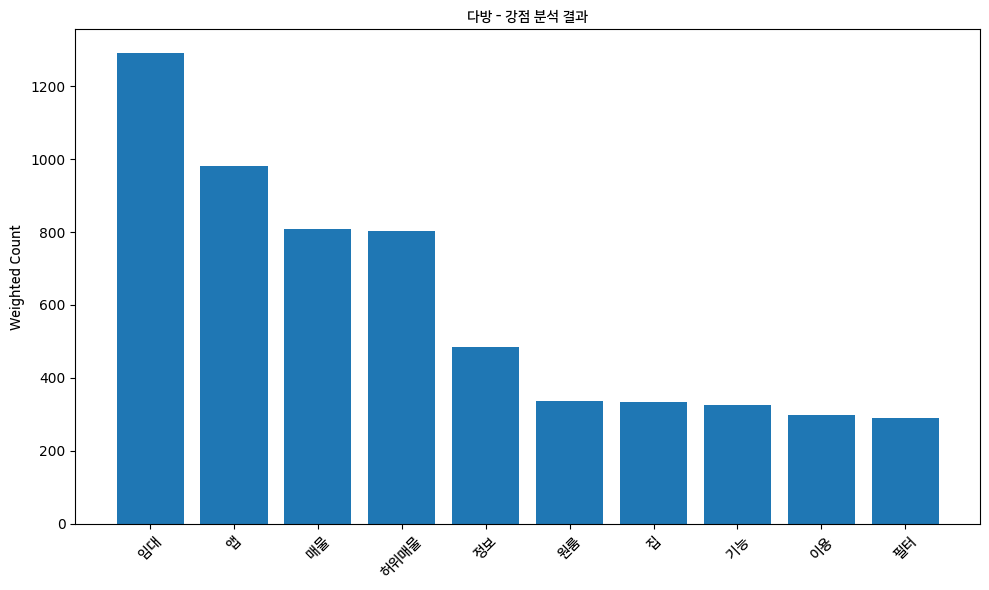

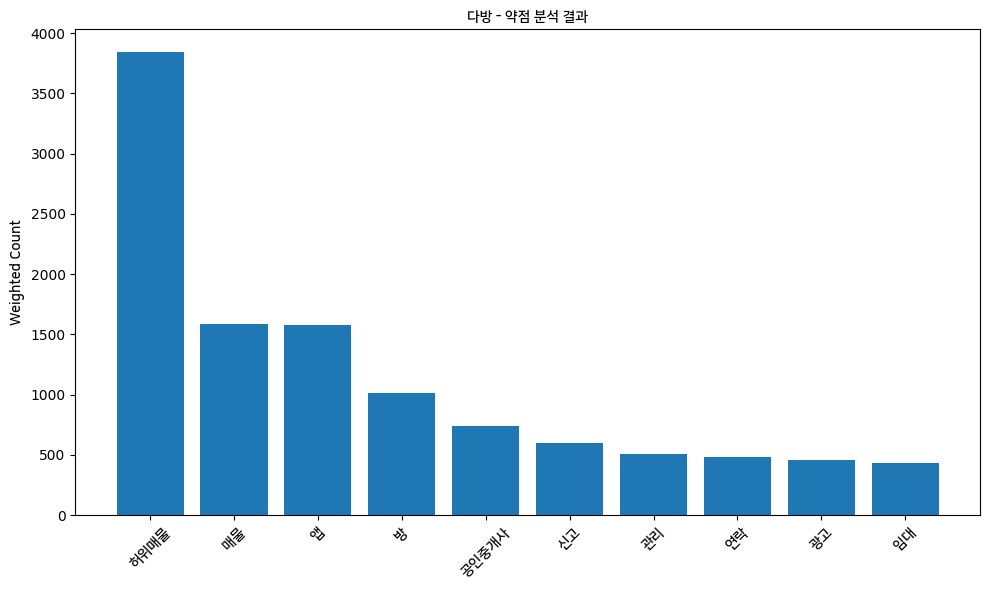

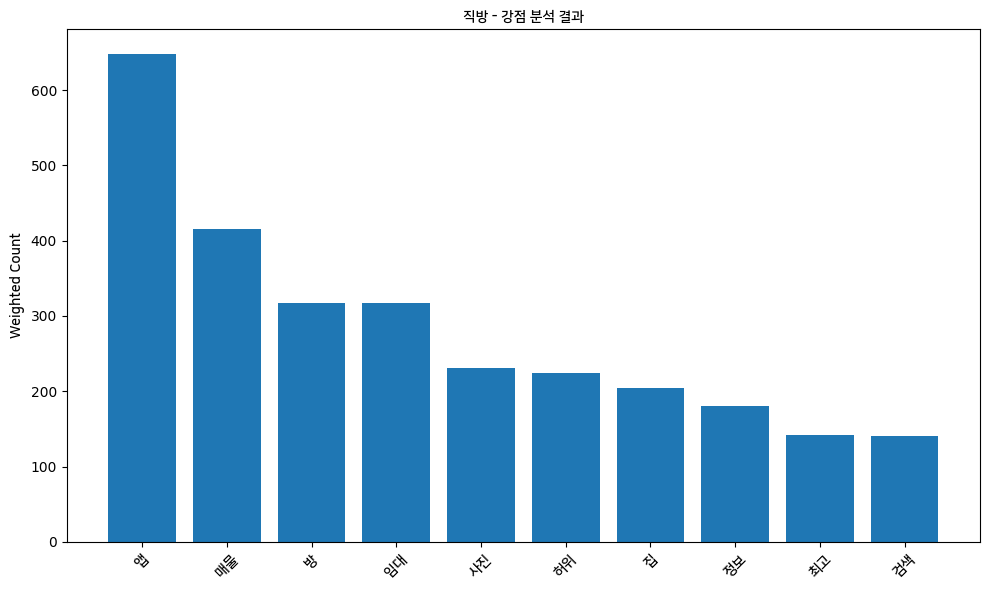

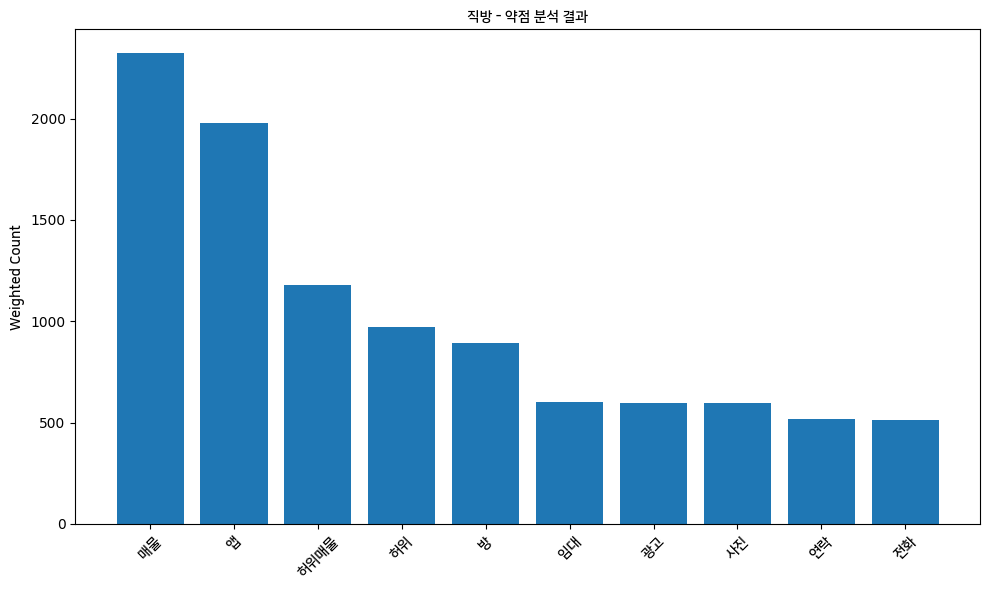

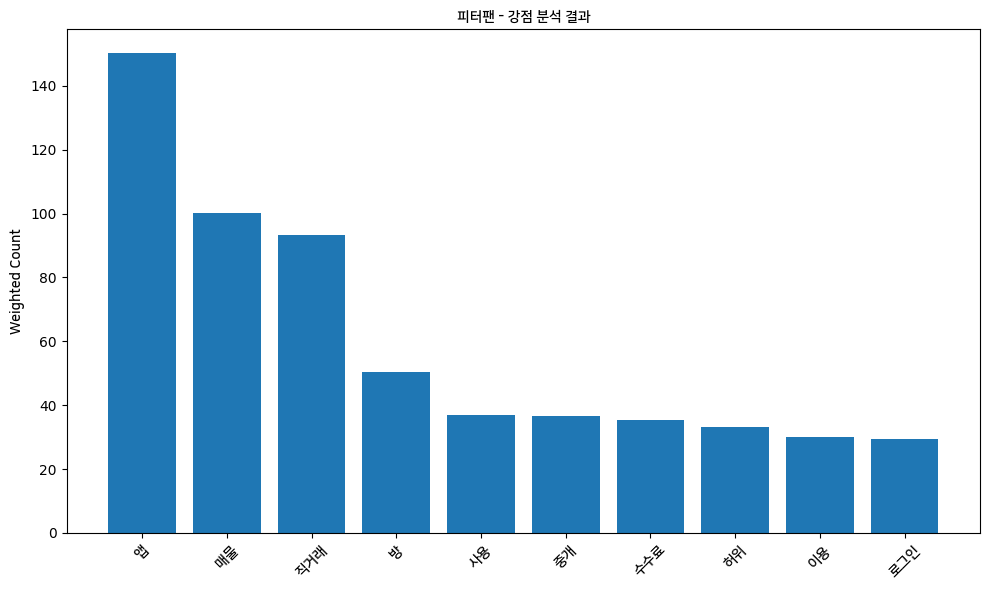

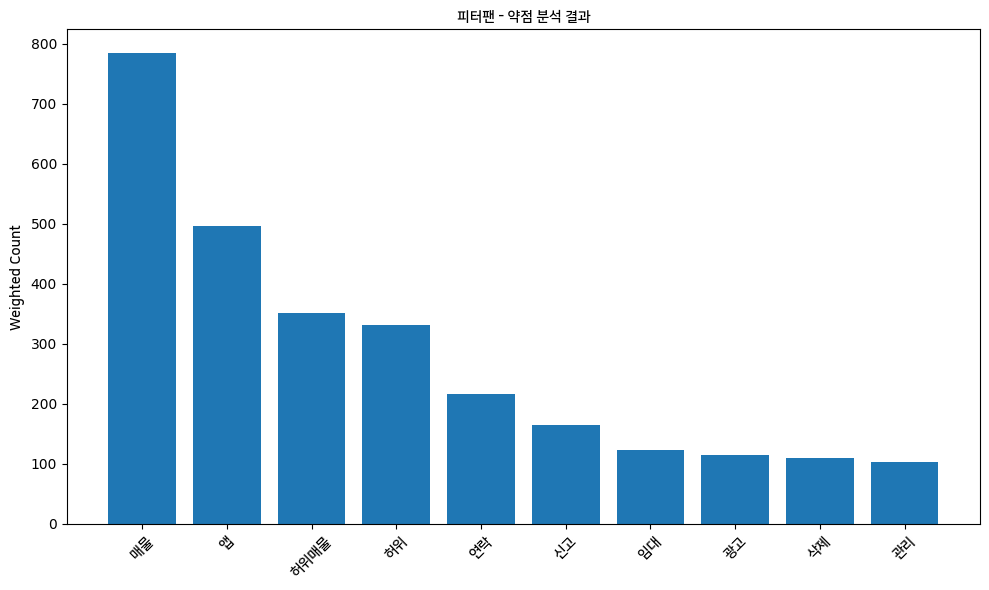

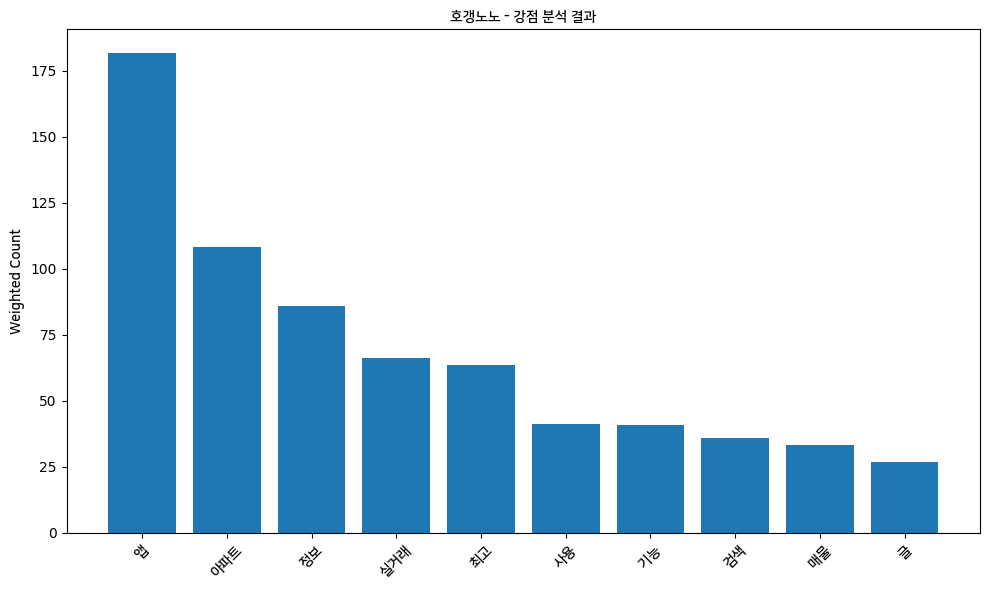

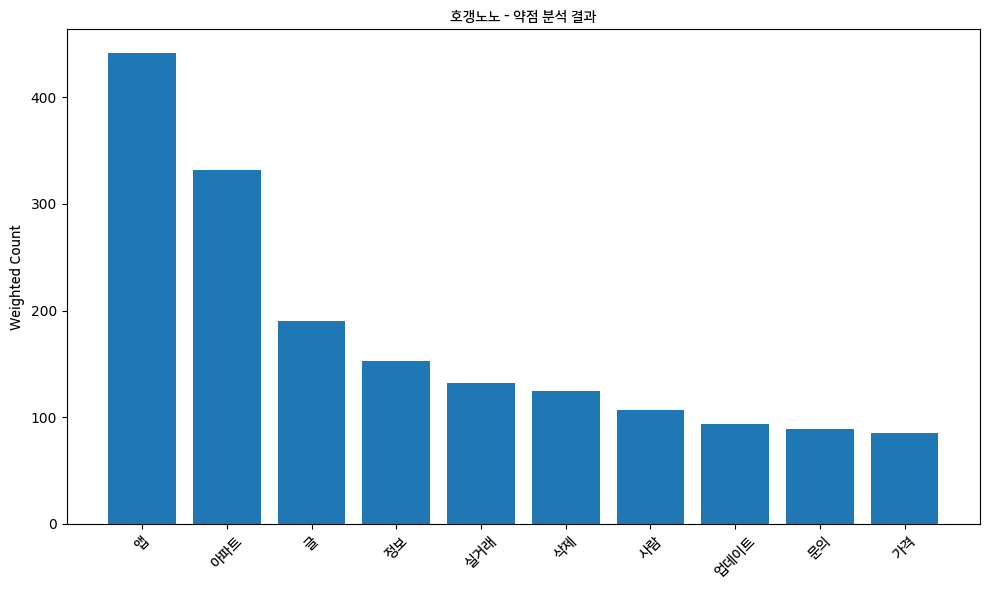

In [ ]:
# 모든 앱에 대해 시각화 실행
for app in app_names:
    plot_app_data(app, log_weighted_path)